In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('downloads/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [5]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [6]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [8]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


In [7]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
print(accuracy*100)

86.16


In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)

In [10]:
print(accuracy_tfidf*100)

86.91


3. ii ) Model a decision tree with TF-IDF features

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)

In [12]:
print(accuracy_dec*100)

71.74000000000001


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [22]:
# helps in model building
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [14]:
# helps in text preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [27]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

[[1148, 3671, 9852, 849, 1119, 376, 21997, 51, 34614, 1639, 58, 93, 89, 1417, 3587, 536, 1739, 2053, 23070, 1246, 68414, 17410, 1701, 90, 13784, 2988, 1, 21, 42, 63, 4406, 4239, 136, 5, 10514, 52, 86, 70, 21998, 1601, 51, 86, 6, 2, 521, 700, 81, 415, 2325, 921, 3, 158, 921, 104, 511, 13, 13, 45], [14, 255, 4966, 3760, 10326, 345, 42, 99, 1588, 14928, 2471, 40, 496, 38398, 126, 6151, 2374, 162, 155, 1155, 3207, 124, 395, 78, 337, 13161, 5, 39, 1848, 3461, 43767, 22, 1853, 9252, 1, 124, 61, 42, 128, 817, 2149, 187, 719, 468, 151, 145, 44, 419, 54, 817, 416, 42, 735, 7, 3497, 5, 369, 596, 21022, 1015, 51982, 1, 42, 183, 821, 2919, 14, 5, 249, 68415, 1002, 8612, 6208, 54, 817, 2567, 5, 1890, 50, 7968, 250, 4101, 2316, 54, 685, 335, 12584, 1, 1716, 99, 1525, 1616, 409, 70, 118, 108, 1442, 266, 187, 12306, 6387, 77, 127, 8494, 2283, 298, 2132, 12306, 37, 1566, 5268, 43768, 304, 68416, 4223, 817, 1008, 1222, 1027, 97, 15, 1483, 56, 94, 176, 409, 1303, 42, 12584, 1, 11, 441, 354, 47, 5311, 104

In [35]:
max_length = 128
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[1148 3671 9852 ...    0    0    0]
 [   5  369  596 ...   42   54  809]
 [  20  882    2 ...    0    0    0]
 ...
 [ 259 1794   39 ...    0    0    0]
 [   6   84   27 ...    0    0    0]
 [ 110 1339 5355 ...    0    0    0]]


In [45]:
vocab_size = len(t.word_index) + 1
# define the model
RNNModel64 = Sequential(name="SimpleRNNModel64")
RNNModel64.add(Embedding(vocab_size, 64, input_length=max_length))
RNNModel64.add(SimpleRNN(64, return_sequences=False))
RNNModel64.add(Dense(64, activation='relu'))
RNNModel64.add(keras.layers.Dropout(0.5))
RNNModel64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(1e-5)

# compile the model
RNNModel64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel64.summary())

Model: "SimpleRNNModel64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 64)            8900032   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,912,513
Trainable params: 8,912,513
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
def plot_training_graph(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/100
1125/1125 [==============================] - 115s 101ms/step - loss: 2.5126 - accuracy: 0.5008 - val_loss: 0.7675 - val_accuracy: 0.5063
Epoch 2/100
1125/1125 [==============================] - 113s 101ms/step - loss: 0.9826 - accuracy: 0.5072 - val_loss: 0.7182 - val_accuracy: 0.5002
Epoch 3/100
1125/1125 [==============================] - 118s 105ms/step - loss: 0.9051 - accuracy: 0.5122 - val_loss: 0.7187 - val_accuracy: 0.5038
Epoch 4/100
1125/1125 [==============================] - 144s 128ms/step - loss: 0.8719 - accuracy: 0.5154 - val_loss: 0.7069 - val_accuracy: 0.5060
Epoch 5/100
1125/1125 [==============================] - 151s 134ms/step - loss: 0.8503 - accuracy: 0.5225 - val_loss: 0.7049 - val_accuracy: 0.5085
Epoch 6/100
1125/1125 [==============================] - 115s 102ms/step - loss: 0.8081 - accuracy: 0.5312 - val_loss: 0.7008 - val_accuracy: 0.5157
Epoch 7/100
1125/1125 [==============================] - 114s 101ms/step - loss: 0.7954 - accuracy: 0.5314

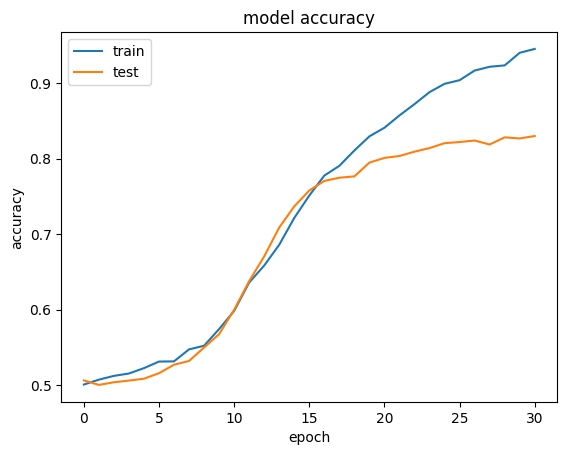

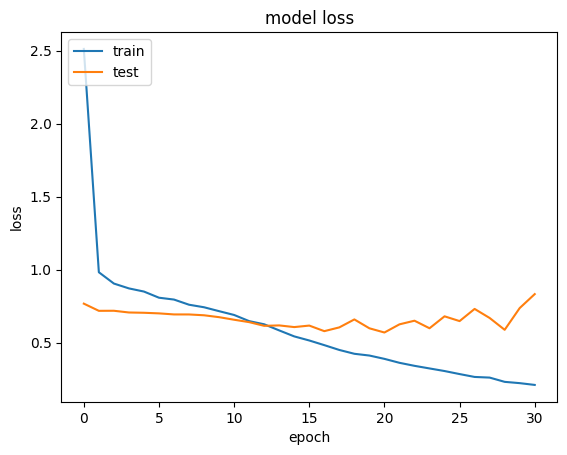

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [55]:
preds_rnn_64 = (RNNModel64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [56]:
c_report(y_test, preds_rnn_64)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5044
           1       0.83      0.85      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy : 0.8398


0.8398

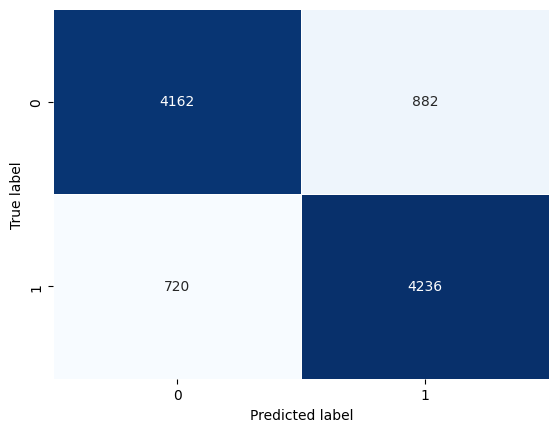

In [57]:
plot_confusion_matrix(y_test, preds_rnn_64)

4. Developing Deep neural networks:

    a. RNN model.
    
      2. 256 hidden-vector dimension.


In [63]:
# define the model
RNNModel256 = Sequential(name="SimpleRNNModel256")
RNNModel256.add(Embedding(vocab_size, 256, input_length=max_length))
RNNModel256.add(SimpleRNN(256, return_sequences=False))
RNNModel256.add(Dense(256, activation='relu'))
RNNModel256.add(keras.layers.Dropout(0.5))
RNNModel256.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
RNNModel256.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel256.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,797,505
Trainable params: 35,797,505
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 514s 456ms/step - loss: 1.8721 - accuracy: 0.5036 - val_loss: 0.7164 - val_accuracy: 0.5128
Epoch 2/100
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9338 - accuracy: 0.5159 - val_loss: 0.7018 - val_accuracy: 0.5310
Epoch 3/100
1125/1125 [==============================] - 475s 422ms/step - loss: 0.8536 - accuracy: 0.5385 - val_loss: 0.6928 - val_accuracy: 0.5445
Epoch 4/100
1125/1125 [==============================] - 476s 423ms/step - loss: 0.7736 - accuracy: 0.5683 - val_loss: 0.6766 - val_accuracy: 0.5742
Epoch 5/100
1125/1125 [==============================] - 481s 427ms/step - loss: 0.7163 - accuracy: 0.6034 - val_loss: 0.6616 - val_accuracy: 0.6028
Epoch 6/100
1125/1125 [==============================] - 419s 372ms/step - loss: 0.6339 - accuracy: 0.6693 - val_loss: 0.5937 - val_accuracy: 0.7048
Epoch 7/100
1125/1125 [==============================] - 472s 420ms/step - loss: 0.5759 - accuracy: 0.7365

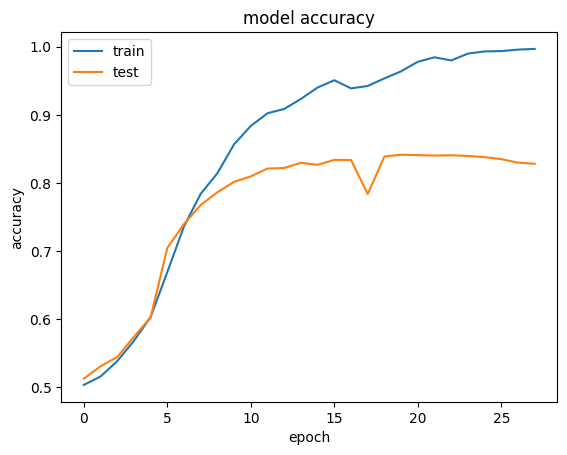

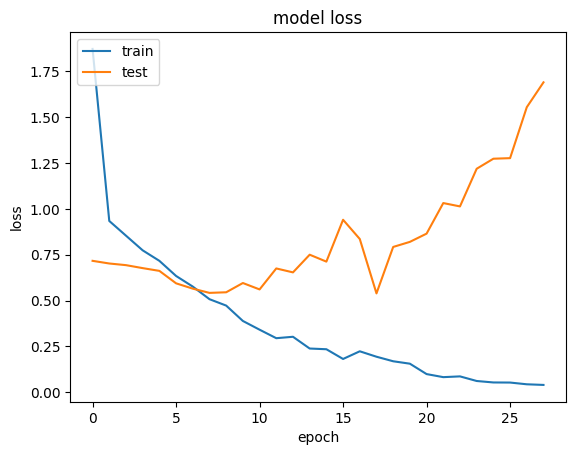

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel256.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [68]:
preds_rnn_256 = (RNNModel256.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 4s 11ms/step


In [69]:
c_report(y_test, preds_rnn_256)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5044
           1       0.82      0.85      0.83      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy : 0.8338


0.8338

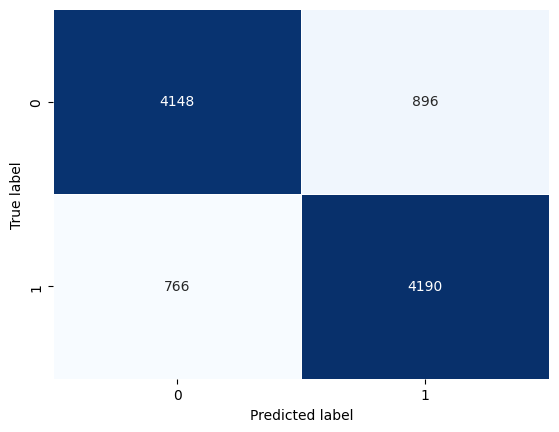

In [70]:
plot_confusion_matrix(y_test, preds_rnn_256)

4. Developing Deep neural networks:

    b. 1-layer LSTM model


In [90]:
# define the model
SingleLSTMLayer64 = Sequential(name="SingleLSTMLayer64")
SingleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
SingleLSTMLayer64.add(LSTM(64, return_sequences=False))
SingleLSTMLayer64.add(Dense(64, activation='relu'))
SingleLSTMLayer64.add(keras.layers.Dropout(0.5))
SingleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleLSTMLayer64.summary())

Model: "SingleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35,686,529
Trainable params: 35,686,529
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 485s 430ms/step - loss: 2.7373 - accuracy: 0.4984 - val_loss: 1.6726 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 504s 448ms/step - loss: 1.6927 - accuracy: 0.4984 - val_loss: 1.4675 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 494s 439ms/step - loss: 1.4390 - accuracy: 0.4984 - val_loss: 1.2839 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 498s 443ms/step - loss: 1.2266 - accuracy: 0.4987 - val_loss: 1.0605 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 501s 445ms/step - loss: 0.9420 - accuracy: 0.5040 - val_loss: 0.7310 - val_accuracy: 0.5155
Epoch 6/100
1125/1125 [==============================] - 513s 456ms/step - loss: 0.7070 - accuracy: 0.5661 - val_loss: 0.6232 - val_accuracy: 0.7175
Epoch 7/100
1125/1125 [==============================] - 496s 441ms/step - loss: 0.5935 - accuracy: 0.6987

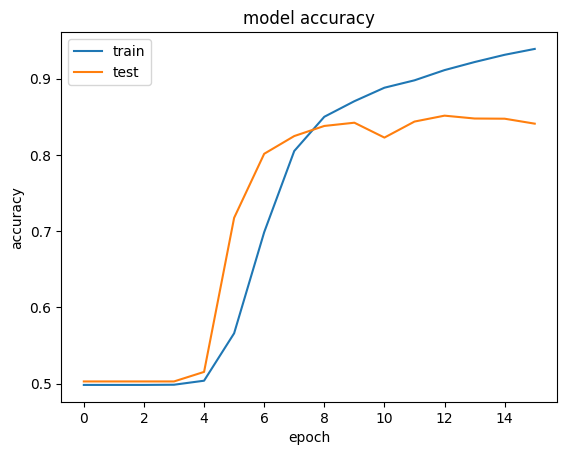

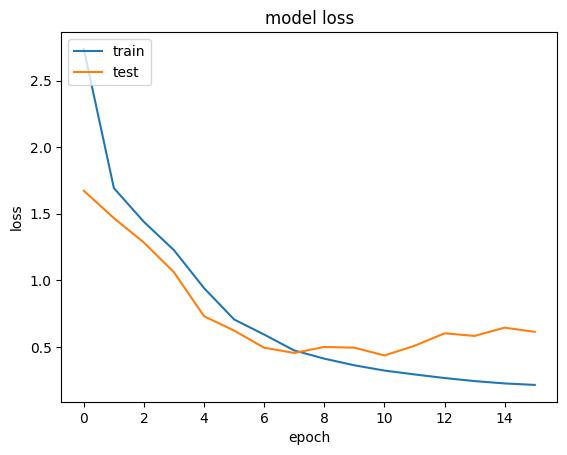

In [91]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = SingleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [92]:
preds_1_lstm_64 = (SingleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 8s 23ms/step


In [93]:
c_report(y_test, preds_1_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5044
           1       0.89      0.77      0.83      4956

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Accuracy : 0.8427


0.8427

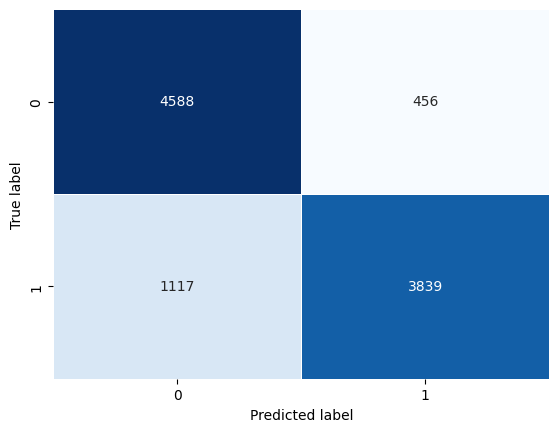

In [94]:
plot_confusion_matrix(y_test, preds_1_lstm_64)

4. Developing Deep neural networks:

    c. 2-layer LSTM model


In [95]:
# define the model
DoubleLSTMLayer64 = Sequential(name="DoubleLSTMLayer64")
DoubleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
DoubleLSTMLayer64.add(LSTM(64, return_sequences=True))
DoubleLSTMLayer64.add(LSTM(32, return_sequences=False))
DoubleLSTMLayer64.add(Dense(32, activation='relu'))
DoubleLSTMLayer64.add(keras.layers.Dropout(0.5))
DoubleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
DoubleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(DoubleLSTMLayer64.summary())

Model: "DoubleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm_4 (LSTM)               (None, 64, 64)            82176     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 35,695,809
Trainable params: 35,695

Epoch 1/100
1125/1125 [==============================] - 521s 458ms/step - loss: 2.5319 - accuracy: 0.4984 - val_loss: 1.6423 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 509s 453ms/step - loss: 1.5724 - accuracy: 0.4984 - val_loss: 1.3608 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 504s 448ms/step - loss: 1.2891 - accuracy: 0.4984 - val_loss: 1.1185 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 498s 443ms/step - loss: 1.0293 - accuracy: 0.4991 - val_loss: 0.8483 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 508s 451ms/step - loss: 0.7897 - accuracy: 0.5174 - val_loss: 0.6778 - val_accuracy: 0.5540
Epoch 6/100
1125/1125 [==============================] - 501s 445ms/step - loss: 0.6969 - accuracy: 0.5762 - val_loss: 0.6184 - val_accuracy: 0.7312
Epoch 7/100
1125/1125 [==============================] - 507s 451ms/step - loss: 0.6113 - accuracy: 0.6751

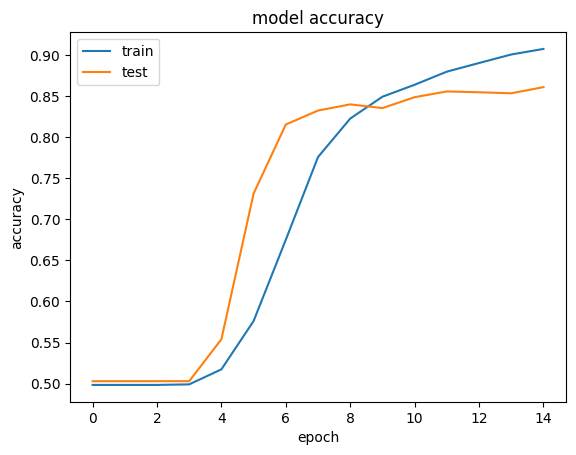

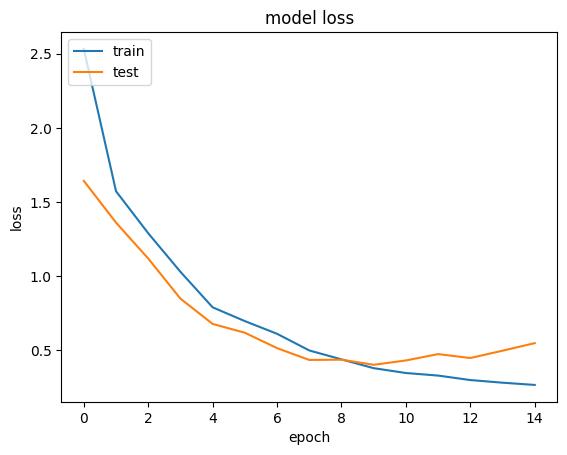

In [96]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = DoubleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [97]:
preds_2_lstm_64 = (DoubleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 5s 14ms/step


In [99]:
c_report(y_test, preds_2_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5044
           1       0.85      0.86      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy : 0.8579


0.8579

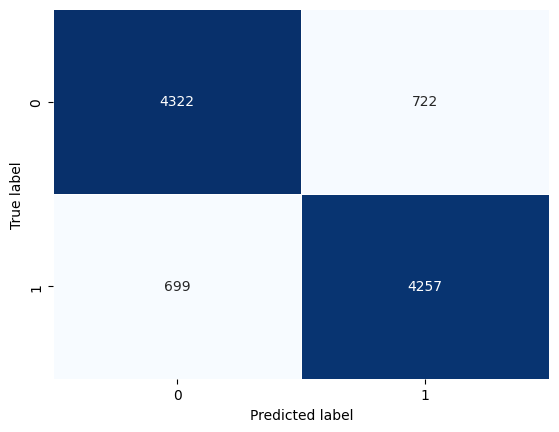

In [100]:
plot_confusion_matrix(y_test, preds_2_lstm_64)

4. Developing Deep neural networks:

    d. 1-layer Bi-LSTM model


In [109]:
# define the model
SingleBiLSTMModel = Sequential(name="SingleBiLSTMModel")
SingleBiLSTMModel.add(Embedding(vocab_size, 256, input_length=max_length))
SingleBiLSTMModel.add(Bidirectional(LSTM(64, return_sequences=False)))
SingleBiLSTMModel.add(Dense(32, activation='relu'))
SingleBiLSTMModel.add(keras.layers.Dropout(0.5))
SingleBiLSTMModel.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleBiLSTMModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleBiLSTMModel.summary())

Model: "SingleBiLSTMModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 35,768,641
Trainable params: 35,768,641
Non-trainable params: 0
_____________________________________

Epoch 1/100
1125/1125 [==============================] - 500s 442ms/step - loss: 3.2358 - accuracy: 0.4984 - val_loss: 1.6910 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 452s 402ms/step - loss: 1.8111 - accuracy: 0.4984 - val_loss: 1.4645 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 449s 399ms/step - loss: 1.5207 - accuracy: 0.4984 - val_loss: 1.3288 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 466s 414ms/step - loss: 1.3407 - accuracy: 0.4984 - val_loss: 1.2011 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 441s 392ms/step - loss: 1.1920 - accuracy: 0.4984 - val_loss: 1.0829 - val_accuracy: 0.5030
Epoch 6/100
1125/1125 [==============================] - 440s 391ms/step - loss: 1.0679 - accuracy: 0.4999 - val_loss: 0.9584 - val_accuracy: 0.5030
Epoch 7/100
1125/1125 [==============================] - 439s 390ms/step - loss: 0.9344 - accuracy: 0.5044

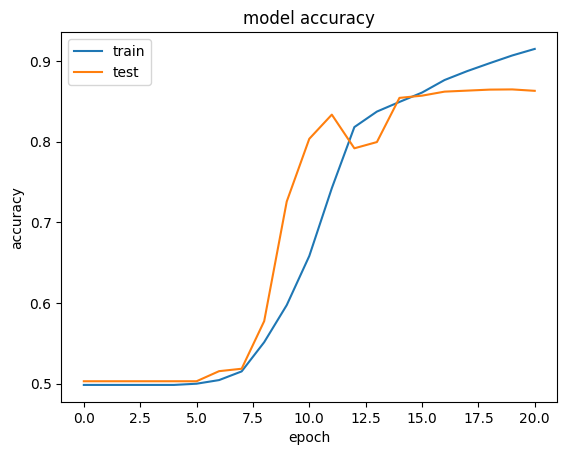

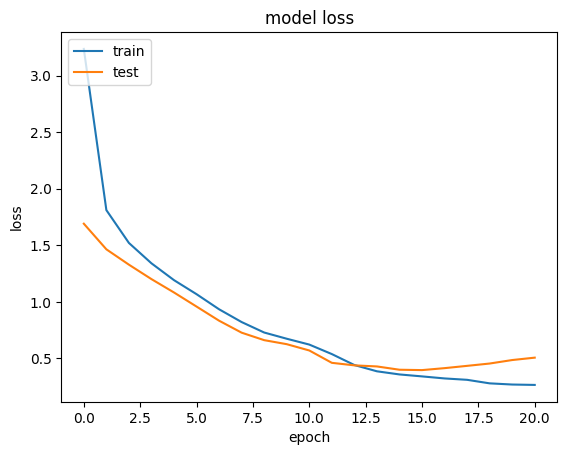

In [110]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = SingleBiLSTMModel.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [114]:
preds_bilstm_64 = (SingleBiLSTMModel.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 5s 15ms/step


In [115]:
c_report(y_test, preds_bilstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5044
           1       0.87      0.86      0.86      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy : 0.8667


0.8667

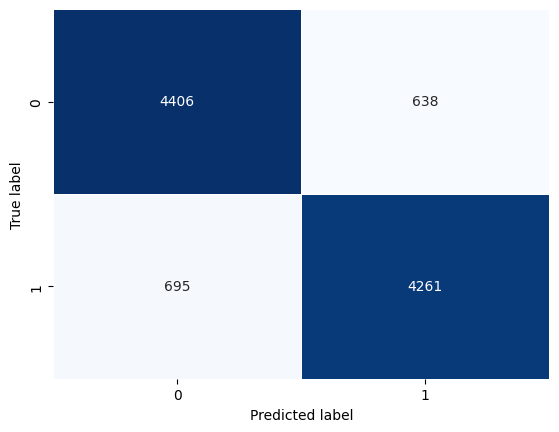

In [116]:
plot_confusion_matrix(y_test, preds_bilstm_64)

4. Developing Deep neural networks:

    e. Use Google word2vec embeddings as input embedding to model in 4.d. [Compare the performance 4.e vs 4.d]


In [36]:
from gensim.models import Word2Vec

Embedding_dimensions = 256

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 38416


In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))

for word, token in t.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (139063, 256)


In [41]:
#max_length = 64

# define the model
BiLSTMLayerWithWord2Vec = Sequential(name="BiLSTMLayerWithWord2Vec")
BiLSTMLayerWithWord2Vec.add(Embedding(vocab_size, 256, input_length=max_length,
                                      weights=[embedding_matrix],trainable = False))
BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))
BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=False)))
BiLSTMLayerWithWord2Vec.add(Dense(32, activation='relu'))
BiLSTMLayerWithWord2Vec.add(Dropout(0.2))
BiLSTMLayerWithWord2Vec.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
BiLSTMLayerWithWord2Vec.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(BiLSTMLayerWithWord2Vec.summary())

Model: "BiLSTMLayerWithWord2Vec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 256)          35600128  
                                                                 
 bidirectional_2 (Bidirectio  (None, 128, 256)         394240    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)     

Epoch 1/100
1125/1125 [==============================] - 393s 345ms/step - loss: 0.8711 - accuracy: 0.5259 - val_loss: 0.6482 - val_accuracy: 0.6225
Epoch 2/100
1125/1125 [==============================] - 390s 346ms/step - loss: 0.6354 - accuracy: 0.6443 - val_loss: 0.5643 - val_accuracy: 0.7212
Epoch 3/100
1125/1125 [==============================] - 394s 350ms/step - loss: 0.5909 - accuracy: 0.7066 - val_loss: 0.5359 - val_accuracy: 0.7498
Epoch 4/100
1125/1125 [==============================] - 418s 371ms/step - loss: 0.5713 - accuracy: 0.7374 - val_loss: 0.5277 - val_accuracy: 0.7713
Epoch 5/100
1125/1125 [==============================] - 403s 358ms/step - loss: 0.5469 - accuracy: 0.7521 - val_loss: 0.4993 - val_accuracy: 0.7883
Epoch 6/100
1125/1125 [==============================] - 397s 353ms/step - loss: 0.5312 - accuracy: 0.7555 - val_loss: 0.4722 - val_accuracy: 0.8005
Epoch 7/100
1125/1125 [==============================] - 393s 349ms/step - loss: 0.5045 - accuracy: 0.7820

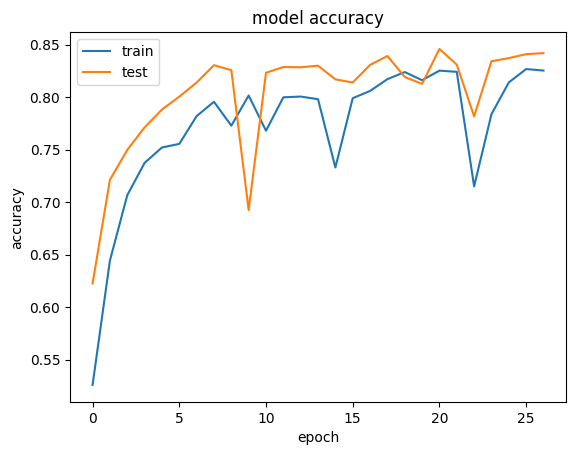

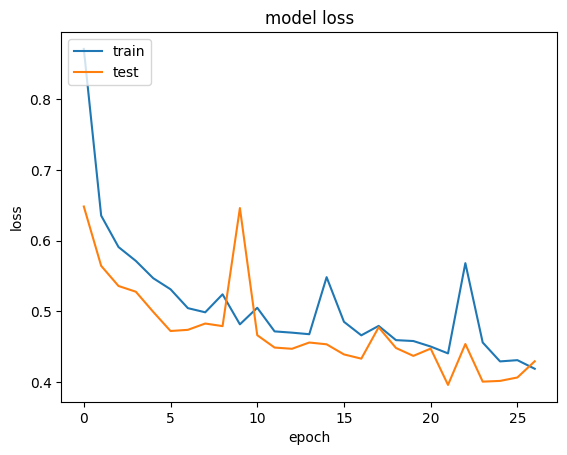

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = BiLSTMLayerWithWord2Vec.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [44]:
preds_2_lstm_64_w2v = (BiLSTMLayerWithWord2Vec.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 45s 141ms/step


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5044
           1       0.81      0.89      0.85      4956

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Accuracy : 0.8446


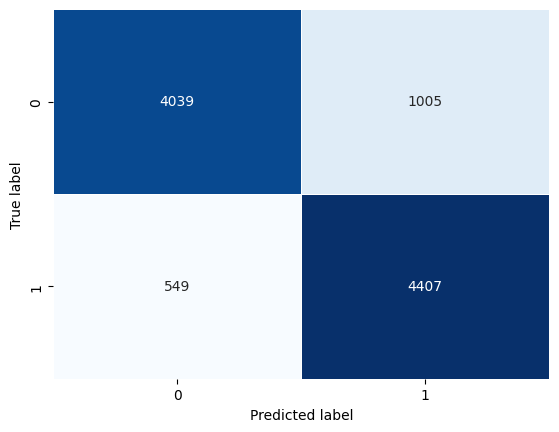

In [45]:
c_report(y_test, preds_2_lstm_64_w2v)
plot_confusion_matrix(y_test, preds_2_lstm_64_w2v)